In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# create data
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

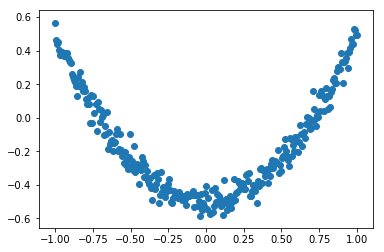

In [3]:
plt.scatter(x_data, y_data)
plt.show()

In [4]:
def fc_layer(input, size_in, size_out, activation_function=None):
    w = tf.Variable(tf.random_normal([size_in, size_out]))
    b = tf.Variable(tf.zeros([size_out]))
    w_b = tf.matmul(input, w) + b
  
    if activation_function is None:
        outputs = w_b
    else:
        outputs = activation_function(w_b)
    
    return outputs

In [5]:
# starts the tensorflow stuff
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

In [6]:
# make the layers
l1 = fc_layer(x, 1, 10, activation_function=tf.nn.relu)
preds = fc_layer(l1, 10, 1)

# get the error
error = tf.reduce_mean(tf.reduce_sum(tf.square(y - preds), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(error)

In [7]:
# initializes the variables and starts the session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [8]:
for i in range(5000):
    sess.run(train_step, feed_dict={x: x_data, y: y_data})
    if i % 500 == 0:
        step_error = sess.run(error, feed_dict={x: x_data, y: y_data})
        print('Step: %d' % i)
        print(step_error)
        

Step: 0
3.09865
Step: 500
0.0064906
Step: 1000
0.00384465
Step: 1500
0.00338702
Step: 2000
0.00321925
Step: 2500
0.00309344
Step: 3000
0.00301798
Step: 3500
0.00296028
Step: 4000
0.00291174
Step: 4500
0.00288141


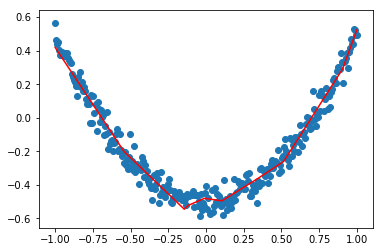

In [9]:
# plot the results
y_hat = sess.run(preds, feed_dict={x: x_data, y: y_data})
plt.scatter(x_data, y_data)
plt.plot(x_data, y_hat, color='red')
plt.show()